In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [100]:
data=pd.read_csv("/content/loan_data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [102]:
print(data['Gender'].value_counts(),'\n')
print(data['Married'].value_counts(),'\n')
print(data['Dependents'].value_counts(),'\n')
print(data['Education'].value_counts(),'\n')
print(data['Self_Employed'].value_counts(),'\n')
print(data['Property_Area'].value_counts(),'\n')
print(data['Loan_Status'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64


In [103]:
data['Gender']=data['Gender'].replace(['Female','Male'],[0,1])
data['Married']=data['Married'].replace(['No','Yes'],[0,1])
data['Dependents']=data['Dependents'].replace(['0','1','2','3+'],[0,1,2,3])
data['Education']=data['Education'].replace(['Not Graduate','Graduate'],[0,1])
data['Self_Employed']=data['Self_Employed'].replace(['No','Yes'],[0,1])
data['Property_Area']=data['Property_Area'].replace(['Rural','Semiurban','Urban'],[1,2,3])
data['Loan_Status']=data['Loan_Status'].replace(['N','Y'],[0,1])

In [104]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1


In [105]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,2.037459,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


In [106]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.175970,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,-0.024556,0.019857
Married,0.369612,1.000000,0.343417,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.002918,0.089280
Dependents,0.175970,0.343417,1.000000,-0.059161,0.057867,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006828,0.006781
Education,-0.049258,-0.014223,-0.059161,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.065243,0.085884
Self_Employed,-0.009829,0.001909,0.057867,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.031214,-0.002303
ApplicantIncome,0.053989,0.051332,0.118679,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.083946,0.077770,0.027259,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.106947,0.149519,0.163997,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.075117,-0.103810,-0.100484,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,0.016337,0.004381,-0.050082,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678


In [107]:
data.drop(['Loan_ID'] ,axis = 1, inplace = True)
data.drop(['Dependents'] ,axis = 1, inplace = True)
data.drop(['Self_Employed'] ,axis = 1, inplace = True)
data.drop(['ApplicantIncome'] ,axis = 1, inplace = True)

In [108]:
data.isnull().sum()

Gender               13
Married               3
Education             0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [109]:
data['Gender'].fillna( data.Gender.mode()[0] , inplace = True ) #.mode() -> return object and we need the frist val so .mode().iloc[0] or just mode()[0]
data['Married'].fillna( data.Married.mode()[0] ,inplace = True)
data['LoanAmount'].fillna( data.LoanAmount.std() ,inplace = True)
data['Loan_Amount_Term'].fillna( data.Loan_Amount_Term.mode()[0] ,inplace = True)
data['Credit_History'].fillna( data.Credit_History.mode()[0] ,inplace = True )

In [110]:
data.isnull().sum()

Gender               0
Married              0
Education            0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Split Data

In [111]:
X = data.drop('Loan_Status',axis=1)
Y = data['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

# Data scaling

In [112]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
x_train.head()

,Gender,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,1.0,0.000000,0.170767,0.74359,0.0,0.5
1,1.0,0.0,1.0,0.000000,0.125904,0.74359,1.0,1.0
2,0.0,1.0,1.0,0.058824,0.146165,0.74359,1.0,1.0
3,0.0,0.0,1.0,0.000000,0.089725,0.74359,1.0,0.0
4,0.0,0.0,1.0,0.000000,0.183792,0.74359,0.0,0.5


# Principal Component Analysis

In [113]:
pca = PCA(n_components = 3)
 
X_train = pca.fit_transform(x_train) 
X_test = pca.fit_transform(x_test) 
 
explained_variance = pca.explained_variance_ratio_

# Logistic Regression
(with pca)

In [114]:
lr = LogisticRegression(solver='liblinear' ,random_state=1)
lr = lr.fit(X_train ,y_train )
y_pred = lr.predict(X_test)

In [115]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n" ,cm)
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[ 4 35]
 [ 0 84]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.10      0.19        39
           1       0.71      1.00      0.83        84

    accuracy                           0.72       123
   macro avg       0.85      0.55      0.51       123
weighted avg       0.80      0.72      0.62       123



In [116]:
print("Accuracy:",lr.score(X_test ,y_test))
print("\nMean Squared Error: " , mean_squared_error(y_test, y_pred))

Accuracy: 0.7154471544715447

Mean Squared Error:  0.2845528455284553


# Logistic Regression
(without pca)

In [117]:
lr = LogisticRegression(solver='liblinear' ,random_state=1)
lr = lr.fit(x_train ,y_train )
y_pred = lr.predict(x_test)
print("Accuracy:",lr.score(x_test ,y_test))
print("\nMean Squared Error: " , mean_squared_error(y_test, y_pred))

Accuracy: 0.8048780487804879

Mean Squared Error:  0.1951219512195122


# SVM

In [118]:
classifier = svm.LinearSVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [119]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n" ,cm)
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[16 23]
 [ 2 82]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



In [120]:
print("Accuracy:",classifier.score(x_test,y_test))
print("\nMean Squared Error: " , mean_squared_error(y_test, y_pred))

Accuracy: 0.7967479674796748

Mean Squared Error:  0.2032520325203252


# Decision Tree Classifier

In [121]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4 )
clf.fit(x_train ,y_train)
y_pred = clf.predict(x_test)

In [122]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n" ,cm)
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[18 21]
 [ 3 81]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.46      0.60        39
           1       0.79      0.96      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



In [123]:
print("Accuracy:",clf.score(x_test,y_test))
print("\nMean Squared Error: " , mean_squared_error(y_test, y_pred))

Accuracy: 0.8048780487804879

Mean Squared Error:  0.1951219512195122


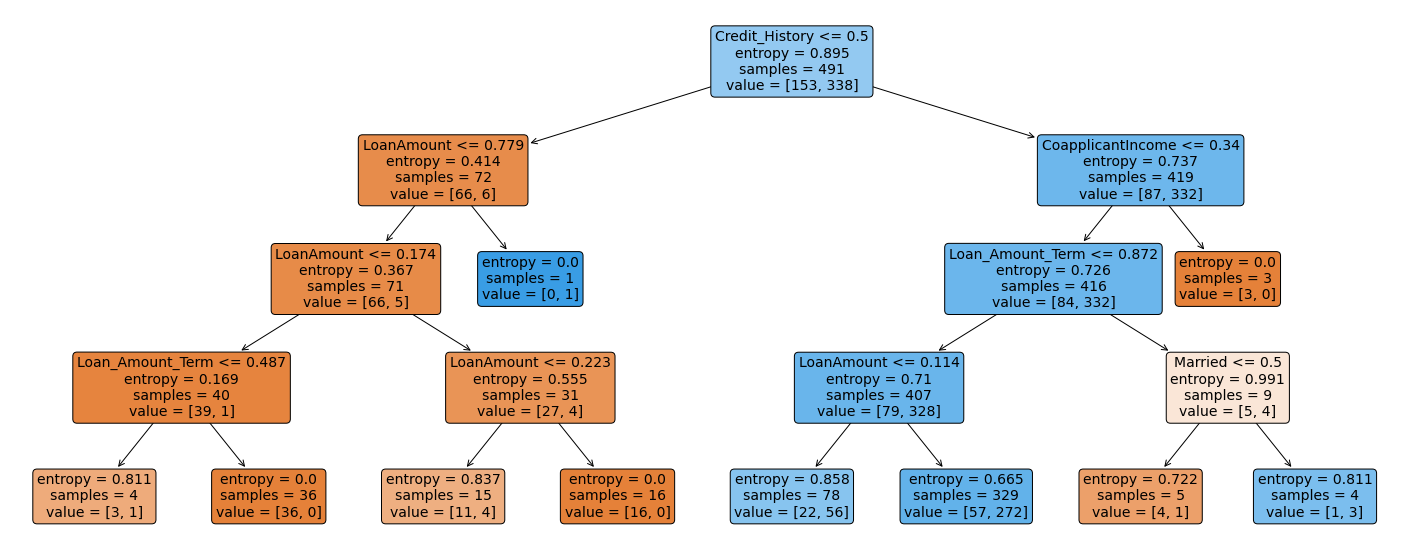

In [124]:
plt.figure(figsize=(25,10))
a = plot_tree(clf,
              feature_names=x_train.columns,
              filled=True, 
              rounded=True, 
              fontsize=14)

# Random Forest

In [125]:
clf=RandomForestClassifier(n_estimators=2000,random_state=1, max_depth=4)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [126]:
print("Accuracy:",clf.score(x_test,y_test))
print("\nMean Squared Error: " , mean_squared_error(y_test, y_pred))

Accuracy: 0.8130081300813008

Mean Squared Error:  0.18699186991869918


# Naive bayes

In [127]:
clf=BernoulliNB()
clf.fit(x_train ,y_train)
y_pred = clf.predict(x_test)

In [128]:
print("Accuracy:",clf.score(x_test,y_test))
print("\nMean Squared Error: " , mean_squared_error(y_test, y_pred))

Accuracy: 0.8048780487804879

Mean Squared Error:  0.1951219512195122


# KNN

In [129]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [130]:
print("Accuracy:",knn.score(x_test,y_test))
print("\nMean Squared Error: " , mean_squared_error(y_test, y_pred))

Accuracy: 0.7967479674796748

Mean Squared Error:  0.2032520325203252
